# seaborn
学习了Pandas如何处理数据以及用Matplotlib对数据进行可视化，在今天的课程中我们再来感受一个更具魅力的绘图工具，它叫做Seaborn。  
![](./picture/13-1.png)
## Seaborn简介
Seaborn 是基于 Python 且非常受欢迎的图形可视化库，并且在 Matplotlib 的基础上，进行了更高级的封装，使得作图更加方便快捷。可以通过极简的代码，做出具有分析价值而又十分美观的图形。  
我们先来看一下Seaborn绘制的图形。    
同样在使用Seaborn之前我们需要将其导入：  
代码片段  
```
import seaborn as sns
```
同样在使用Seaborn之前我们需要将其导入：  
首先，我们先了解一下seaborn.set()函数：  
代码片段  
```
sns.set(context='notebook',style='darkgrid',palette='deep',font='sans-serif',font_scale=1,color_codes=True)
```
context=''：参数控制着默认的画幅大小，分别有 {paper, notebook, talk, poster} 四个值。其中，poster > talk > notebook > paper。  
style=''：参数控制默认样式，分别有 {darkgrid, whitegrid, dark, white, ticks}，你可以自行更改查看它们之间的不同。  
palette=''：参数为预设的调色板。分别有 {deep, muted, bright, pastel, dark, colorblind} 等，你可以自行更改查看它们之间的不同。  
font='' 用于设置字体。font_scale= ''：设置字体大小。color_codes=''： 不使用调色板而采用先前的 'r' 等色彩缩写。  
然后，我们使用numpy的np.linspace()函数生成100个0到15的等间隔数列。  
代码片段  
```
x = np.linspace(0, 15, 100)
```
最后用这个数列画出2条曲线：  
```
import numpy as np
def sinplot():
 x = np.linspace(0, 15, 100)
 for i in range(1, 3):
  plt.plot(x, np.sin(x + i))
sinplot()
```
请大家复制上面的代码，绘制2条曲线：  

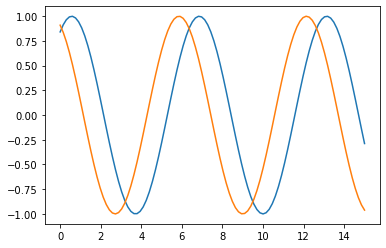

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sinplot():
 x = np.linspace(0, 15, 100)
 for i in range(1, 3):
  plt.plot(x, np.sin(x + i))
sinplot()

代码中，我们没有对风格做任何的设置。
![](./picture/13-5.png)
接下来，我们调用sns.set()函数来改变style，看看效果如何：

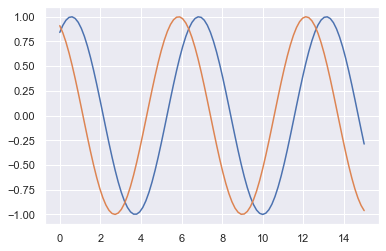

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def sinplot():
	x = np.linspace(0, 15, 100)
	for i in range(1, 3):
		plt.plot(x, np.sin(x + i))
sns.set()
sinplot()
plt.show()

根据结果，我们添加了sns.set()方法后，图形添加了网格，而且隐藏了坐标轴。  
那么，问题来了，有人会说，这个set()函数这么多参数，只要改变其中任意一个参数的值，绘图效果就会发生变化，那我们怎么知道哪种搭配是最佳效果呢，难道我们要一个个去测试吗？   
当然不是，seaborn提供了5种默认的风格，我们在实际绘图中只要选择一种喜欢的风格就可以了，下面我们就看看这5种风格的用法及效果。  
代码片段  
```
sns.set(style='white')
```
![](./picture/13-6.png)
```
sns.set(style='whitegrid')
```
![](./picture/13-7.png)
```
sns.set(style='darkgrid')
```
![](./picture/13-8.png)
```
sns.set(style='dark')
```
![](./picture/13-9.png)
```
sns.set(style='ticks')
```
![](./picture/13-10.png)
请复制上面的代码，体验5这种风格：

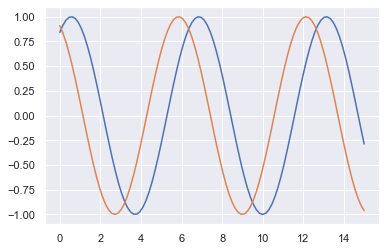

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def sinplot():
	x = np.linspace(0, 15, 100)
	for i in range(1, 3):
		plt.plot(x, np.sin(x + i))
# 设置图像风格
        
sinplot()
plt.show()

当然，除了这5中内置风格以外，我们也可以通过其他函数进行个性化设置。  
比如，当我们的风格设置为style='ticks'时，会有上部和右侧的坐标轴，我们可以使用seaborn.despine()函数进行去除。  
运行下方代码，看看效果：  

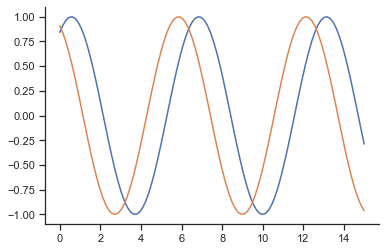

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def sinplot():
	x = np.linspace(0, 15, 100)
	for i in range(1, 3):
		plt.plot(x, np.sin(x + i))
sns.set(style='ticks')
sinplot()
sns.despine()
plt.show()

sns.despine()函数默认移除了上部和右侧的轴，当然我们也可以移除其他轴。  
对于是否移除某个轴，我们可以设置sns.despine()函数的top、right、left、bottom参数的值来控制，
值为True时，会移除该轴，反之，保留该轴。  
现在有同学会问道：在matplotlib中我们已经学过了，在一个figure对象中，我们可以添加多个子图，
那么如何让我们不同的子图使用不同的风格呢？  
莫慌，我们可以使用with设置风格，在with下画的图都可以使用该种风格。  
运行下方代码，查看不同的子图如何使用不同的风格：  


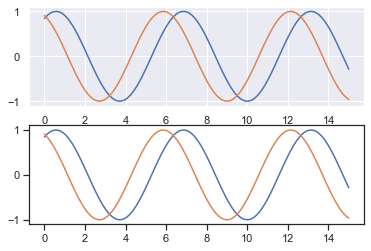

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def sinplot():
	x = np.linspace(0, 15, 100)
	for i in range(1, 3):
		plt.plot(x, np.sin(x + i))

# 设置子图风格
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()

plt.subplot(212)
sinplot()
plt.show()

我们看到第一个子图的风格成功设置成了darkgrid，而且在绘制第二个子图的时候并未受到影响。  
sns.axes_style()的作用是临时设置绘图的参数，也就是只设置使用with打开的作用域内的绘图，不会对其他的图造成影响。  
这就是常用seaborn库的风格设置，我们常会使用sns.set()设置图形风格，以及使用with sns.axes_style()函数给不同的子图设置不同的风格。  
## seaborn调色板及颜色设置
颜色在可视化中非常重要，用来代表各种特征，并且提高整个图的观赏性。  
前面我们学习了如何设置seaborn画图的整体风格，接下来我们学习一下seaborn如何创建调色板以及使用调色板设置颜色。
seaborn调色板？此乃何物？  
调色板就像是装水彩笔的盒子，等我们把图绘制完成以后，使用相应颜色的水彩笔涂上颜色就好了。  
## color_palette()调色板  
seaborn的seaborn.color_palette()函数提供了一组定义好的调色板，也就是我上面所说的装水彩笔的盒子。  
下面我们了解一下这个函数：  
代码片段  
```
seaborn.color_palette(palette=None, n_colors=None, desat=None)
```
该函数的返回值： 是一个调色板定义的一个颜色列表。  
palette：调色板，可以不写，可以填写字符串，也可以是一个序列。  
n_colors：可以指定颜色的数量。  
desat：按照比例降低每一种颜色的饱和度。  
不带任何参数时，表示获取这个盒子里的全部水彩笔。  
下面让我们打开这个盒子，看看里面都有什么颜色的水彩笔。  
代码片段  
```
import seaborn as sns
# 获取默认调色板的颜色列表
current_palette = sns.color_palette()
# 绘制调色板的颜色
sns.palplot(current_palette)
```

color_palette()默认给我们提供了6种主题颜色去对应matplotlib中的10种颜色。  
6个默认的颜色主题分别是： deep，muted，pastel，bright，dark，colorblind。  
下面我们依次看看每种主题色的效果：  

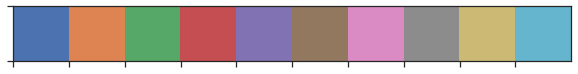

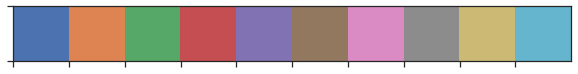

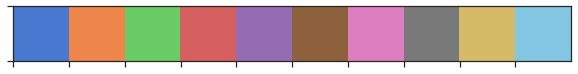

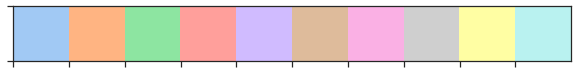

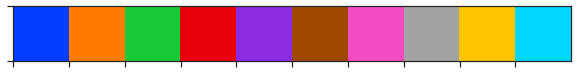

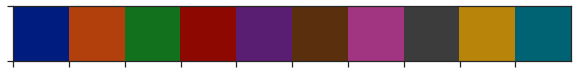

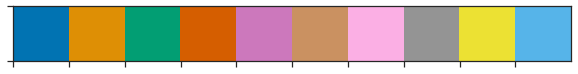

In [12]:
import seaborn as sns
# 获取默认调色板的颜色列表
current_palette = sns.color_palette()
# 绘制调色板的颜色
sns.palplot(current_palette)


theme_list=['deep', 'muted', 'pastel','bright', 'dark', 'colorblind']
for i in theme_list:
    sns.palplot(sns.color_palette(i))

注意： 这六种主题形成的颜色列表中，最多含有10种，如果我们设置n_colors的值多余10中，
就会用这10种颜色进行循环增加。  
运行下方代码，你会发现12个颜色中，前两个和最后两个是一样的：  

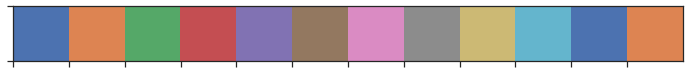

In [15]:
%matplotlib inline
import seaborn as sns
sns.palplot(sns.color_palette("deep", 12))

如果我们想用不同的颜色表示不同的类别，有没有更多的颜色可供我们使用呢？  
最常用的方法是使用hls的颜色空间，这是RGB值的一个简单转换。  
代码片段  
```
sns.palplot(sns.color_palette("hls", 12))
```
hls：大家就可以看做是一个颜色足够丰富的色板。  
运行下面代码，体验调色板：  

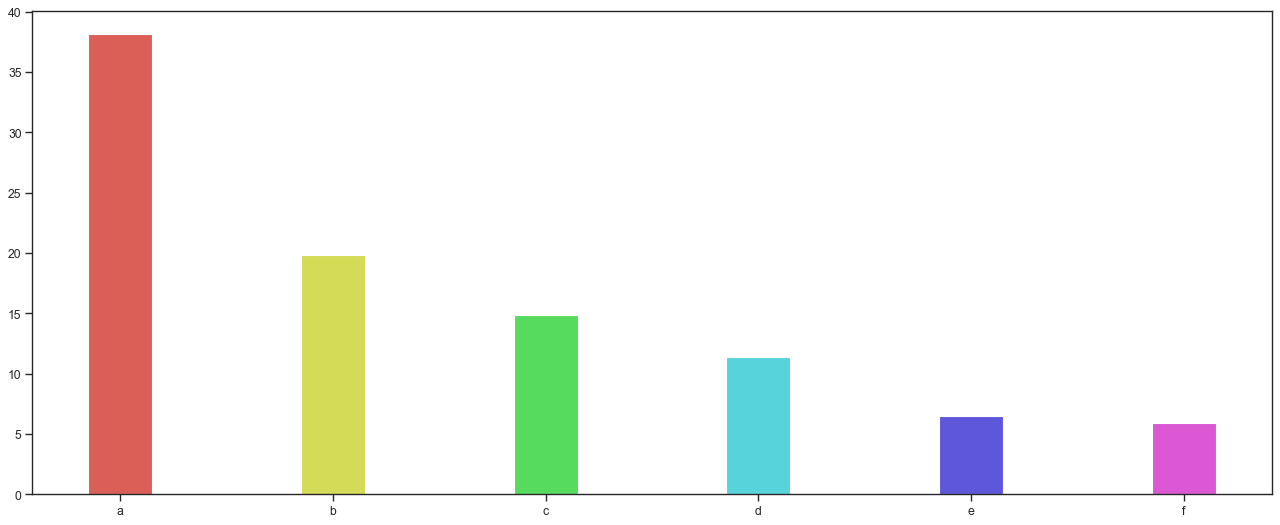

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
a = ['a','b','c','d','e','f']
b =[38.13,19.85,14.89,11.36,6.47,5.93]
plt.figure(figsize=(20,8),dpi=80)

# 绘制条形图
plt.bar(a,b,width=0.3,color=sns.color_palette("hls", 6))
plt.show()

我们看到使用调色板成功的设置了条形图的颜色，如果调色板的颜色少于条形图的个数，将会循环调色板颜色。  
## 本节总结
在本节课中，我们学习了如何设置绘图风格和颜色画板，来看一下今天的知识点：  
![](./picture/13-11.png)
## 下节预告
![](./picture/13-12.png)

## 题目要求
首先来了解一下数据，这是一份从2000年到2008年每个月新生婴儿数据，数据路径为：/data/births.xlsx。运行下方代码，查看数据具体信息：
## 题目讲解
使用matplotlib绘制出每年总出生数的柱状图，并使用seaborn设置一种风格。
## 书写代码

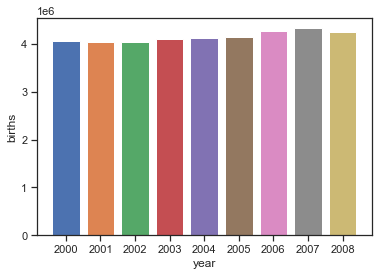

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_excel('./data/births.xlsx')

# 根据年份进行分组
groups = data.groupby(by = 'year')
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df['births'].sum())

# 设置x轴的显示范围
plt.xticks(xticks)
plt.xlabel('year')
plt.ylabel('births')
sns.set(style='darkgrid')
plt.show()

## 第一步:明确目标
本练习继续使用上一个练习的数据集，数据路径为：/data/births.xlsx。 请用两张子图分别绘制出以下图形，并且不同的子图使用不同的风格：
## 第二步:分析过程
1. 绘制出每年出生的男孩柱状图；   
2. 绘制出每年出生的女孩柱状图；  
## 第三步:代码实现

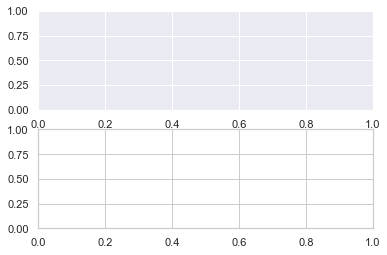

In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_excel('./data/births.xlsx')
# 根据年份进行分组
groups = data.groupby(by = ['year','gender'])
def subplot(gender):
    for group_name,group_df in groups:
        if gender in group_name:
            plt.bar(group_name[0],group_df['births'].sum())

with sns.axes_style("darkgrid"):
    plt.subplot(211)
    subplot('F')
with sns.axes_style("whitegrid"):
    plt.subplot(212)
    subplot('M')
plt.show()